# LR BY Hand
# Using Least Squares Method

y = a + bx


b = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )


OR 


b = covariance(x,y) / variance(x)

a = mean(y) - b * mean(x)

In [44]:
import pandas as pd

In [45]:
# # WAP to find linear regression coefficients given x_train and y_train data
# def lr_coeff(x_train,y_train):
#     x_t = x_train - x_train.mean()
#     y_t = y_train - y_train.mean()
#     covar = sum(x_t*y_t)
#     var = sum(x_t**2) # np.dot
#     b = covar / var
#     a = y_train.mean() - b * x_train.mean()
#     return a,b

In [46]:
from math import sqrt

# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x - mean)**2 for x in values])

In [47]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [48]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

In [49]:
# Calculate root mean squared error RMSE= root(square((y-(a+bx))/n))
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [50]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [51]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


# Library Method


In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [53]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

In [54]:
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [55]:
reg = LinearRegression().fit(X, y)

In [56]:
reg.score(X, y)

1.0

In [57]:
reg.coef_

array([1., 2.])

In [58]:
reg.intercept_

3.0000000000000018

In [59]:
reg.predict(np.array([[3, 5]]))

array([16.])

# Application on Actual Data

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("AutoInsurSweden.txt",sep="\t",skiprows=9)

In [62]:
df.head()

,X,Y
0,108,"392,5"
1,19,"46,2"
2,13,"15,7"
3,124,"422,2"
4,40,"119,4"


In [63]:
df.Y = df.Y.str.replace(',','.')

In [64]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [65]:
df.dtypes

X     int64
Y    object
dtype: object

In [66]:
df.Y = df.Y.astype(float)

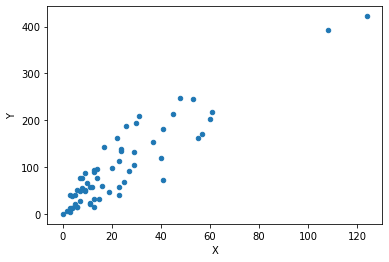

In [67]:
df.plot(x='X', y= 'Y', kind='scatter')

In [68]:
# Split data in Training and testing 
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df.Y,test_size  = 0.3, random_state =7)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
type(X_train), type([df.X])

(pandas.core.frame.DataFrame, list)

In [72]:
reg = LinearRegression().fit(X_train, Y_train)

In [73]:
reg.coef_, reg.intercept_

(array([3.33602385]), 23.75472726509068)

In [74]:
#lr_coeff(X_train.values,Y_train.values)

In [75]:
Y_pred = reg.predict(X_test)

In [76]:
rmse_metric(Y_test.values,Y_pred)

35.86275705806889

# Historical Quotes

In [197]:
hq = pd.read_csv("HistoricalQuotes.csv",parse_dates=['date'],index_col = 0)

In [198]:
hq.head()

,close,volume,open,high,low
date,,,,,
2020-08-30 16:00:00,200.99,"24,619,446",201.23,202.760,199.29
2019-08-09 00:00:00,200.99,24619750.0000,201.30,202.760,199.29
2019-08-08 00:00:00,203.43,27009520.0000,200.20,203.530,199.39
2019-08-07 00:00:00,199.04,33364400.0000,195.41,199.560,193.82
2019-08-06 00:00:00,197.00,35824790.0000,196.31,198.067,194.04


In [199]:
#y -> close  # y is any continous variable we wann pridict
# X -> all remaining values
hq.dtypes

close     float64
volume     object
open      float64
high      float64
low       float64
dtype: object

In [200]:
hq.head()

,close,volume,open,high,low
date,,,,,
2020-08-30 16:00:00,200.99,"24,619,446",201.23,202.760,199.29
2019-08-09 00:00:00,200.99,24619750.0000,201.30,202.760,199.29
2019-08-08 00:00:00,203.43,27009520.0000,200.20,203.530,199.39
2019-08-07 00:00:00,199.04,33364400.0000,195.41,199.560,193.82
2019-08-06 00:00:00,197.00,35824790.0000,196.31,198.067,194.04


In [201]:
hq.volume = hq.volume.str.replace(",","").astype(float)

In [202]:
train_count = int(hq.shape[0] * 0.7)
test_count = hq.shape[0] - train_count
train_count,test_count

(177, 76)

In [203]:
hq_rev = hq.iloc[::-1] #hq[::-1]

In [204]:
hq_rev.head()

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,23389530.0,207.280,209.780,207.20
2018-08-10,207.53,24592460.0,207.360,209.100,206.67
2018-08-13,208.87,25864510.0,207.700,210.952,207.70
2018-08-14,209.75,20679270.0,210.155,210.560,208.26
2018-08-15,210.24,28595230.0,209.220,210.740,208.33


In [205]:
import numpy as np

In [206]:
hq_rev.volume = np.log(hq_rev.volume)

In [207]:
#Y_train = hq_rev.iloc[:train_count,1]
#Y_test = hq_rev.iloc[train_count:,1]
#Y_train.shape, Y_test.shape

In [208]:
Y_train = hq_rev.iloc[:train_count,0]
Y_test = hq_rev.iloc[train_count:,0]
Y_train.shape, Y_test.shape


((177,), (76,))

In [209]:
X_train = hq_rev.iloc[:train_count,1:]          #[0,2,3,4]]
X_test = hq_rev.iloc[train_count:,1:]           #[0,2,3,4]]
X_train.shape, X_test.shape


((177, 4), (76, 4))

In [210]:
X_train.head()

,volume,open,high,low
date,,,,
2018-08-09,16.967799,207.280,209.780,207.20
2018-08-10,17.017950,207.360,209.100,206.67
2018-08-13,17.068382,207.700,210.952,207.70
2018-08-14,16.844642,210.155,210.560,208.26
2018-08-15,17.168750,209.220,210.740,208.33


In [211]:
reg = LinearRegression().fit(X_train, Y_train)

In [212]:
reg.coef_, reg.intercept_

(array([-0.6494885 , -0.58297015,  0.89632509,  0.68018472]),
 12.085724256011645)

In [213]:
Y_pred = reg.predict(X_test)

In [214]:
rmse_metric(Y_test.values,Y_pred)

1.1487256681186282

# Plot Predicted and actual values

In [215]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']

In [216]:
res.head()

,Y_pred,Y_test
0,206.383196,205.28
1,202.988700,204.30
2,205.224245,204.61
3,199.995759,200.67
4,213.352250,210.52


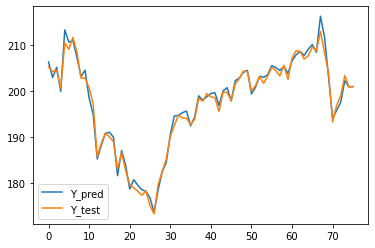

In [217]:
res[['Y_pred', 'Y_test']].plot()

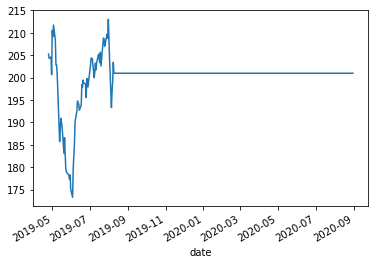

In [218]:
Y_test.plot()

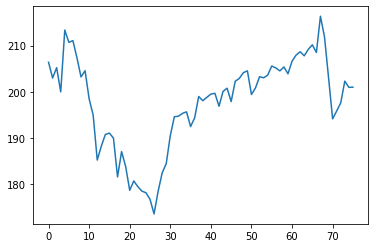

In [219]:
pd.Series(Y_pred).plot()

# Pridict Volume


In [220]:
hq = pd.read_csv("HistoricalQuotes.csv",parse_dates=['date'],index_col = 0)

hq.head()

,close,volume,open,high,low
date,,,,,
2020-08-30 16:00:00,200.99,"24,619,446",201.23,202.760,199.29
2019-08-09 00:00:00,200.99,24619750.0000,201.30,202.760,199.29
2019-08-08 00:00:00,203.43,27009520.0000,200.20,203.530,199.39
2019-08-07 00:00:00,199.04,33364400.0000,195.41,199.560,193.82
2019-08-06 00:00:00,197.00,35824790.0000,196.31,198.067,194.04


In [221]:
#y -> close  # y is any continous variable we wann pridict
# X -> all remaining values
hq.dtypes

close     float64
volume     object
open      float64
high      float64
low       float64
dtype: object

In [222]:
hq.head()

,close,volume,open,high,low
date,,,,,
2020-08-30 16:00:00,200.99,"24,619,446",201.23,202.760,199.29
2019-08-09 00:00:00,200.99,24619750.0000,201.30,202.760,199.29
2019-08-08 00:00:00,203.43,27009520.0000,200.20,203.530,199.39
2019-08-07 00:00:00,199.04,33364400.0000,195.41,199.560,193.82
2019-08-06 00:00:00,197.00,35824790.0000,196.31,198.067,194.04


In [223]:
hq.volume = hq.volume.str.replace(",","").astype(float)

In [224]:
train_count = int(hq.shape[0] * 0.7)
test_count = hq.shape[0] - train_count
train_count,test_count

(177, 76)

In [225]:
hq_rev = hq.iloc[::-1] #hq[::-1]

In [226]:
hq_rev.head()

,close,volume,open,high,low
date,,,,,
2018-08-09,208.88,23389530.0,207.280,209.780,207.20
2018-08-10,207.53,24592460.0,207.360,209.100,206.67
2018-08-13,208.87,25864510.0,207.700,210.952,207.70
2018-08-14,209.75,20679270.0,210.155,210.560,208.26
2018-08-15,210.24,28595230.0,209.220,210.740,208.33


In [227]:
import numpy as np

In [228]:
hq_rev.volume = np.log(hq_rev.volume)

In [229]:
Y_train = hq_rev.iloc[:train_count,1]
# Y_train = hq_rev.loc[:train_count,'volume']
Y_test = hq_rev.iloc[train_count:,1]
Y_train.shape, Y_test.shape


((177,), (76,))

In [230]:
X_train = hq_rev.iloc[:train_count,[0,2,3,4]]
X_test = hq_rev.iloc[train_count:,[0,2,3,4]]

# X_test = hq_rev.loc[train_count:,['close','open',	'high','low']]

X_train.shape, X_test.shape


((177, 4), (76, 4))

In [231]:
X_train.head()

,close,open,high,low
date,,,,
2018-08-09,208.88,207.280,209.780,207.20
2018-08-10,207.53,207.360,209.100,206.67
2018-08-13,208.87,207.700,210.952,207.70
2018-08-14,209.75,210.155,210.560,208.26
2018-08-15,210.24,209.220,210.740,208.33


In [232]:
reg = LinearRegression().fit(X_train, Y_train)

In [233]:
reg.coef_, reg.intercept_

(array([-0.02487968, -0.01492586,  0.14495544, -0.10907843]),
 17.514504846804435)

In [234]:
Y_pred = reg.predict(X_test)

In [235]:
rmse_metric(Y_test.values,Y_pred)

0.2789655336730054

# Plot Predicted and actual values

In [236]:
res = pd.DataFrame([Y_pred,Y_test])
res = res.T
res.columns = ['Y_pred','Y_test']

In [237]:
res.head()

,Y_pred,Y_test
0,17.061864,16.731325
1,17.042211,16.739358
2,16.992772,16.907024
3,17.256385,17.638728
4,17.532072,17.987238


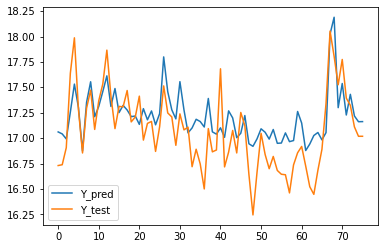

In [238]:
res[['Y_pred', 'Y_test']].plot()

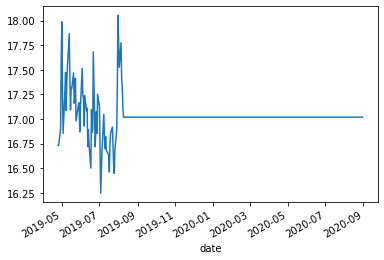

In [239]:
Y_test.plot()

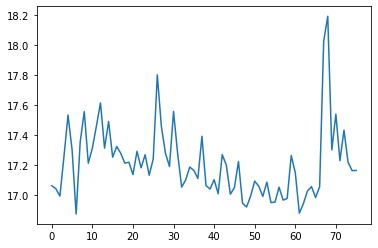

In [240]:
pd.Series(Y_pred).plot()